In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc

**Problem 2, Part d:**

In [ ]:
def cross_correlation(Z_1, Z_2):
# Z_1 is (n_1 x n_2) -> Matrix with the padding or Blue matrix
# Z_2 is (m_1 x m_2) -> Matrix iterating over the Blue matrix
  image_height, image_width = Z_1.shape
  filter_height, filter_width = Z_2.shape
  vertical_padding = filter_height - 1
  horizontal_padding = filter_width - 1
  adj_Z_1 = np.pad(Z_1, ((vertical_padding, vertical_padding), (horizontal_padding, horizontal_padding)), 'constant')
  padded_image_width, padded_image_height = adj_Z_1.shape
  output = np.zeros([image_height + vertical_padding - 1, image_width + horizontal_padding - 1])
  row_counter = 0

  for row_index in range(padded_image_height - filter_height):
    col_counter = 0

    for col_index in range(padded_image_width - filter_width):
      window = adj_Z_1[row_index:row_index+horizontal_padding+1, col_index:col_index+vertical_padding+1]
      
      if window.shape[0] != Z_2.shape[0] and (window.shape[0] == Z_2.shape[1]):
        output[row_counter, col_counter] = np.sum(window*Z_2.T)
        col_counter += 1

      else:
        output[row_counter, col_counter] = np.sum(window*Z_2.T)
        col_counter += 1
      
    row_counter += 1

  return output


2 2
2 2


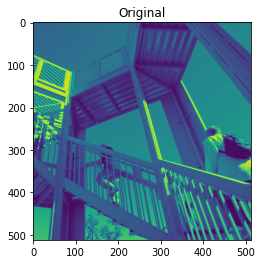

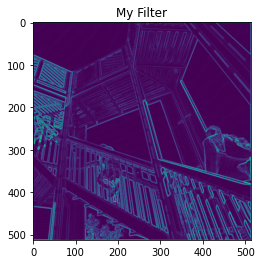

[[ 352.13917703 1107.35811732 1328.         ... 1872.
  1872.         1560.9746955 ]
 [1103.76265565 1514.63923097 1315.00342205 ... 1872.
  1872.         2151.01882837]
 [1309.03093928 1312.49380951   34.66987165 ...    0.
     0.         1872.        ]
 ...
 [2845.00158172 2845.02970108   16.         ...   60.81118318
    59.09314681  944.31033035]
 [2848.         2848.            0.         ...  162.78820596
    21.40093456  918.00871456]
 [2374.81620341 3272.49018333 2848.         ...  908.64734633
   909.09295454 1047.93224972]]


In [ ]:
# k_i is the filter size or kernel size
# i_i is the image size
# s_i is the stride
# p_i is the padding
# Full padding
# output = image size + (kernel size - 1)

np.random.seed(5980)
# Z_1 is the image matrix
# Z_2 is the filter matrix
ascent = misc.ascent()
X_1 = np.array([[-3, 0, 3],[-10, 0, 10], [-3, 0, 3]])
X_2 = X_1.T
G_1 = cross_correlation(ascent, X_1)
G_2 = cross_correlation(ascent, X_2)
output = np.sqrt(G_1**2 + G_2**2)
plt.title("Original")
plt.imshow(ascent)
# No grey scaling
plt.show()
plt.title("My Filter")
plt.imshow(output)
plt.show()
print(output)



**Problem 2, Part e:**

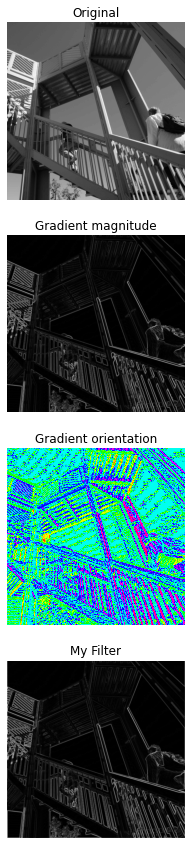

In [ ]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')
fig, (ax_orig, ax_mag, ax_ang, ax_my_filter) = plt.subplots(4, 1, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()

# My Filter
ax_my_filter.imshow(np.absolute(output), cmap = 'gray')
ax_my_filter.set_title("My Filter")
ax_my_filter.set_axis_off()

fig.show()

**Problem 2, Part f:**

In [ ]:
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + np.random.randn(*face.shape) * 50  # add noise
#corr = signal.correlate2d(face, template, boundary='symm', mode='same')
my_corr = cross_correlation(template, face.T)
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
y_1, x_1 = np.unravel_index(np.argmax(my_corr), my_corr.shape)
fig, (ax_orig, ax_template, ax_corr, ax_my_corr) = plt.subplots(4, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
# My Correlation
ax_my_corr.imshow(ax_my_corr, cmap='gray')
ax_my_corr.set_title("My Cross correlation")
ax_my_corr.set_axis_off()
ax_orig.plot(x_1, y_1, 'ro')
fig.show()

through corr
1023 767


ValueError: ignored